## Lectura y preparacion

In [92]:
import pandas as pd

data = pd.read_csv('nuevo_df.csv')
data = data.drop('Otro..especifique..1', axis=1)
data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
1,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos
2,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,60-90 minutos
3,Sí,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
4,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos


In [93]:
import pandas as pd

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
#data = data.loc[data['duracion_intervencion'] != '0-5 minutos']
#data = data.loc[data['duracion_intervencion'] != '>180 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())

# Resetear el índice del DataFrame limpio
data.reset_index(drop=True, inplace=True)

Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '120-180 minutos' '90-120 minutos'
 '>180 minutos']


In [94]:
tiempo = data['duracion_intervencion'].copy()
data.drop('duracion_intervencion', axis = 1, inplace=True)
data = data.astype(str)

In [95]:
# Nombre del archivo donde guardarás la información
filename = 'column_values.txt'

# Abrir un archivo para escribir
with open(filename, 'w') as file:
    for column in data.columns:
        # Obtener los valores únicos y convertirlos a lista
        unique_values = data[column].unique().tolist()
        # Crear una cadena de texto con el nombre de la columna y sus valores únicos
        unique_values_str = ', '.join(map(str, unique_values))
        # Escribir en el archivo
        file.write(f'{column}:\n{unique_values_str}\n\n')

print(f'Archivo "{filename}" ha sido creado exitosamente.')

Archivo "column_values.txt" ha sido creado exitosamente.


In [96]:
lines = []

# Frecuencia de valores únicos para cada columna
for column in data.columns:
    lines.append(f"Frecuencia de valores únicos en la columna {column}:\n")
    lines.append(data[column].value_counts().to_string())
    lines.append("\n\n")

# Escribir todo al archivo de texto
with open("Antes.txt", "w") as f:
    f.write("\n".join(lines))

print("La información ha sido exportada a 'output.txt'")

La información ha sido exportada a 'output.txt'


In [97]:
!pip install datacleaner
from datacleaner import autoclean

data= autoclean(data)

data['duracion_intervencion'] = tiempo



In [98]:
lines = []

# Frecuencia de valores únicos para cada columna
for column in data.columns:
    lines.append(f"Frecuencia de valores únicos en la columna {column}:\n")
    lines.append(data[column].value_counts().to_string())
    lines.append("\n\n")

# Escribir todo al archivo de texto
with open("Despues.txt", "w") as f:
    f.write("\n".join(lines))

print("La información ha sido exportada a 'output.txt'")

La información ha sido exportada a 'output.txt'


In [67]:
categorical_cols = [col for col in data.columns if col != 'duracion_intervencion']

df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

df_encoded.head()

,duracion_intervencion,Medicación.Actual_1,Alcohol_1,Alcohol_2,Otras.Drogas_1,Tipo.de.Intervención.Quirúrgica_1,Tipo.de.Intervención.Quirúrgica_2,Tipo.de.cirugía_1,Tipo.de.cirugía_2,Tipo.de.cirugía_3,...,Implante.3...Defecto.tipo.II..supraóseo..3_1,Implante.4...Posición.2_1,Implante.4...Defecto.tipo.I..infraóseo..2_1,Implante.4...Defecto.tipo.II..supraóseo..2_1,Implante.5...Posición.1_1,Implante.5...Defecto.tipo.I..infraóseo..1_1,Implante.5...Defecto.tipo.II..supraóseo..1_1,Implante.6...Posición_1,Implante.6...Defecto.tipo.I..infraóseo._1,Implante.6...Defecto.tipo.II..supraóseo._1
0,10-20 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20-40 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,60-90 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10-20 minutos,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20-40 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Tranformación temporal

In [68]:
data['duracion_intervencion'].value_counts()

duracion_intervencion
20-40 minutos      955
10-20 minutos      761
40-60 minutos      361
5-10 minutos       354
60-90 minutos      160
0-5 minutos        127
90-120 minutos      58
120-180 minutos     22
>180 minutos         8
Name: count, dtype: int64

In [69]:
# Convertir duración de intervención a minutos
duration_mapping = {
    '>180 minutos': 180,
    '120-180 minutos': 120,
    '90-120 minutos': 90,
    '0-5 minutos': 2.5,
    '5-10 minutos': 7.5,
    '40-60 minutos': 40,
    '10-20 minutos': 10,
    '20-40 minutos': 20,
    '60-90 minutos': 60}

data['duracion_intervencion'] = data['duracion_intervencion'].replace(duration_mapping)

In [70]:
data['duracion_intervencion']

0       10.0
1       20.0
2       60.0
3       10.0
4       20.0
        ... 
2801    40.0
2802    10.0
2803     7.5
2804    10.0
2805    10.0
Name: duracion_intervencion, Length: 2806, dtype: float64

In [71]:
data

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40.0
2802,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0
2803,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.5
2804,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0


# Extraccion de caracteristicas RF

In [72]:
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

In [73]:
le = LabelEncoder()
data['Tipo.de.Intervención.Quirúrgica'] = le.fit_transform(data['Tipo.de.Intervención.Quirúrgica'])

# Aplicar SMOTE para sobre-muestreo en los datos
smote = SMOTE(random_state=42)
data_resampled, y_resampled = smote.fit_resample(data.drop('Tipo.de.Intervención.Quirúrgica', axis=1), data['Tipo.de.Intervención.Quirúrgica'])

# Combinar las características re-muestreadas y la variable objetivo en un solo DataFrame
data_resampled['Tipo.de.Intervención.Quirúrgica'] = y_resampled

# Convertir la variable objetivo de nuevo a su forma original si es necesario
data_resampled['Tipo.de.Intervención.Quirúrgica'] = le.inverse_transform(data_resampled['Tipo.de.Intervención.Quirúrgica'])
data=data_resampled


In [74]:
# Mostrar el resumen de la variable 'Tipo.de.Intervención.Quirúrgica'
print(data_resampled['Tipo.de.Intervención.Quirúrgica'].value_counts())


Tipo.de.Intervención.Quirúrgica
0    2632
1    2632
2    2632
Name: count, dtype: int64


In [75]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the number of NaN values in the target variable
nan_count = Y_train.isna().sum()
print(f"Number of NaN values in Y_train: {nan_count}")

# Remove rows where Y_train is NaN
mask = Y_train.notna()  # Mask of non-NaN values
Y_train = Y_train[mask]
X_train = X_train.loc[mask]


Number of NaN values in Y_train: 0


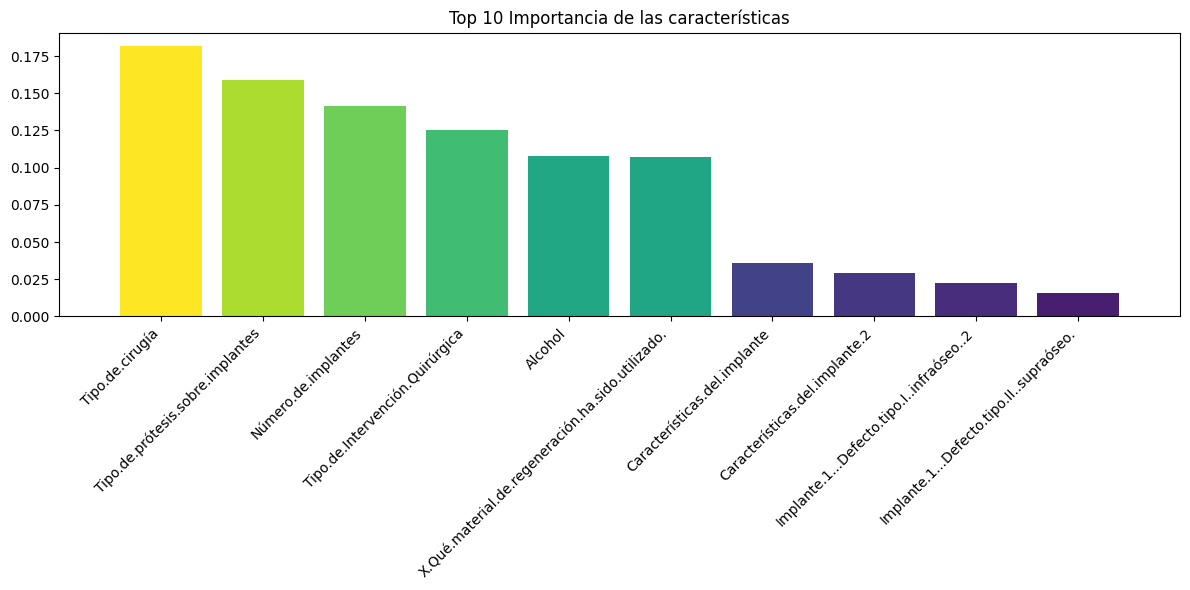

In [76]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest para regresión
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = data.columns.tolist()

# Asegurarte de no incluir la columna objetivo en la lista de nombres de características
feature_names = np.array([name for name in feature_names if name != 'duracion_intervencion'])
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = data[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo


In [77]:
data_reduced.columns = ['Tipo Intervencion',
                'Tipo de Cirugia',
                "Material de regeneracion",
                "Numero de implante",
                "Tipo de Pprotesis sobre implante",
                "Caracteristicas del implante",
                "Implante 1 defecto tipo 1 infraóseo",
                "Alcohol",
               "Medicacion actual",
                "Posicion del implante",
                "duracion_intervencion"]

In [78]:
data = data_reduced
data.head()

,Tipo Intervencion,Tipo de Cirugia,Material de regeneracion,Numero de implante,Tipo de Pprotesis sobre implante,Caracteristicas del implante,Implante 1 defecto tipo 1 infraóseo,Alcohol,Medicacion actual,Posicion del implante,duracion_intervencion
0,0,0,0,0,2,0,0,0,0,0,10.0
1,0,0,0,0,2,0,0,0,0,0,20.0
2,0,0,0,0,2,0,0,0,0,0,60.0
3,0,0,0,0,2,0,0,0,0,0,10.0
4,0,0,0,0,2,0,0,0,0,0,20.0


In [79]:
# Nombre del archivo donde guardarás la información
filename = 'column_values_arbol.txt'

# Abrir un archivo para escribir
with open(filename, 'w') as file:
    for column in data.columns:
        # Obtener los valores únicos y convertirlos a lista
        unique_values = data[column].unique().tolist()
        # Crear una cadena de texto con el nombre de la columna y sus valores únicos
        unique_values_str = ', '.join(map(str, unique_values))
        # Escribir en el archivo
        file.write(f'{column}:\n{unique_values_str}\n\n')

print(f'Archivo "{filename}" ha sido creado exitosamente.')

Archivo "column_values_arbol.txt" ha sido creado exitosamente.


In [86]:
data

,Tipo Intervencion,Tipo de Cirugia,Material de regeneracion,Numero de implante,Tipo de Pprotesis sobre implante,Caracteristicas del implante,Implante 1 defecto tipo 1 infraóseo,Alcohol,Medicacion actual,Posicion del implante,duracion_intervencion
0,0,0,0,0,2,0,0,0,0,0,10.0
1,0,0,0,0,2,0,0,0,0,0,20.0
2,0,0,0,0,2,0,0,0,0,0,60.0
3,0,0,0,0,2,0,0,0,0,0,10.0
4,0,0,0,0,2,0,0,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
7891,0,0,0,2,2,0,0,0,0,0,120.0
7892,0,0,0,2,2,0,0,0,0,0,40.0
7893,0,0,0,2,2,0,0,0,0,0,60.0
7894,0,0,0,2,2,0,0,0,0,0,40.0


La información ha sido exportada a 'output.txt'


# Arbol de Regresión

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of NaN values in the target variable
nan_count = Y_train.isna().sum()
print(f"Number of NaN values in Y_train: {nan_count}")

# Remove rows where Y_train is NaN
mask = Y_train.notna()  # Mask of non-NaN values
Y_train = Y_train[mask]
X_train = X_train.loc[mask]

# Crear y entrenar el modelo
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, Y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)



# Calcular errores
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

# Resultados de las métricas
mae, mse, rmse

# Descomentar para ejecución real
# model.fit(X, y)
# df.to_csv('data_prepared.csv', index=False)


Number of NaN values in Y_train: 0


(11.840106564445147, 374.2620339635051, 19.345853146436966)

In [82]:
# Seleccionar una instancia aleatoria de 'data'
random_instance = data.sample(n=1, random_state=np.random.randint(0, 10000))

# Separar las características de la instancia seleccionada
random_instance_features = random_instance.drop('duracion_intervencion', axis=1)

# Hacer una predicción para la instancia seleccionada
random_instance_prediction = model.predict(random_instance_features)

# Mostrar la instancia seleccionada y la predicción
print("Instancia aleatoria seleccionada:")
print(random_instance)


print("\nPredicción para la instancia seleccionada:")
print(random_instance_prediction)

Instancia aleatoria seleccionada:
      Tipo Intervencion  Tipo de Cirugia  Material de regeneracion  \
1834                  0                0                         0   

      Numero de implante  Tipo de Pprotesis sobre implante  \
1834                   0                                 2   

      Caracteristicas del implante  Implante 1 defecto tipo 1 infraóseo  \
1834                             0                                    0   

      Alcohol  Medicacion actual  Posicion del implante  duracion_intervencion  
1834        0                  0                      0                   10.0  

Predicción para la instancia seleccionada:
[19.93800372]


In [83]:
# Exportamos el modelo
from joblib import dump

# Supongamos que 'modelo' es tu modelo entrenado
dump(model, 'modelo_entrenado.joblib')


['modelo_entrenado.joblib']

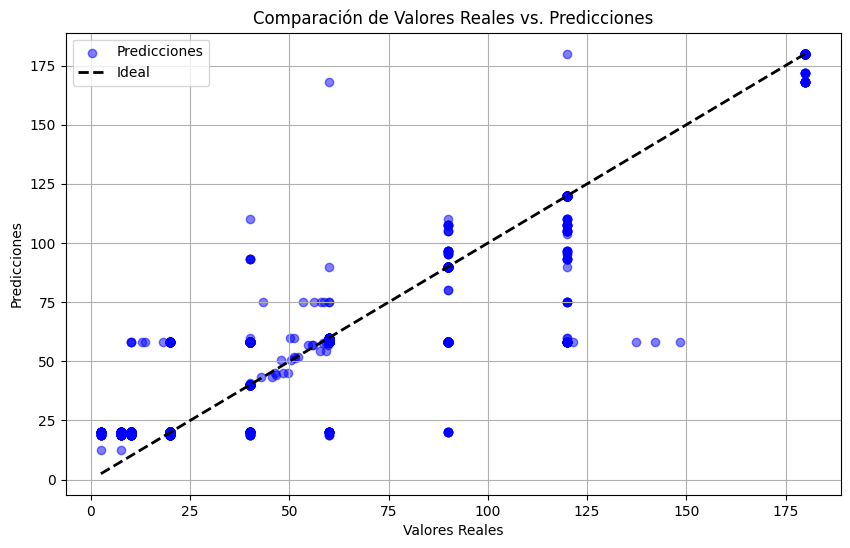

In [84]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de los valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()
